In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('/content/credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,3.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.columns.values

array(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype=object)

In [6]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.785899,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.089065,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Text(0.5, 1.02, 'Count of TARGET Variable per category')

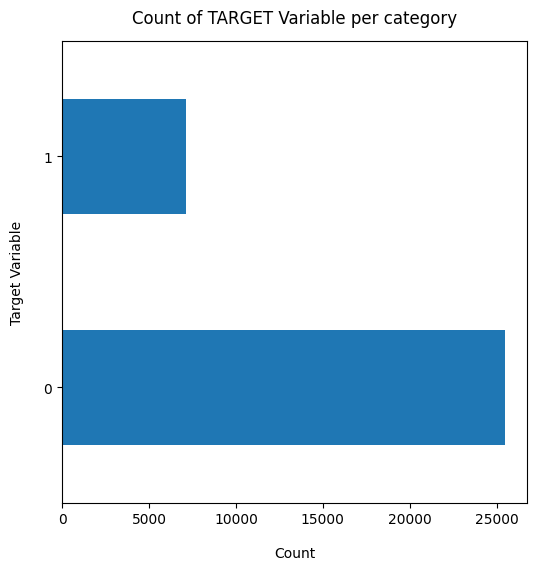

In [8]:
df['loan_status'].value_counts().plot(kind='barh', figsize=(6, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [9]:
100*df['loan_status'].value_counts()/len(df['loan_status'])

,count
loan_status,
0,78.183604
1,21.816396


In [10]:
df['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


In [11]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


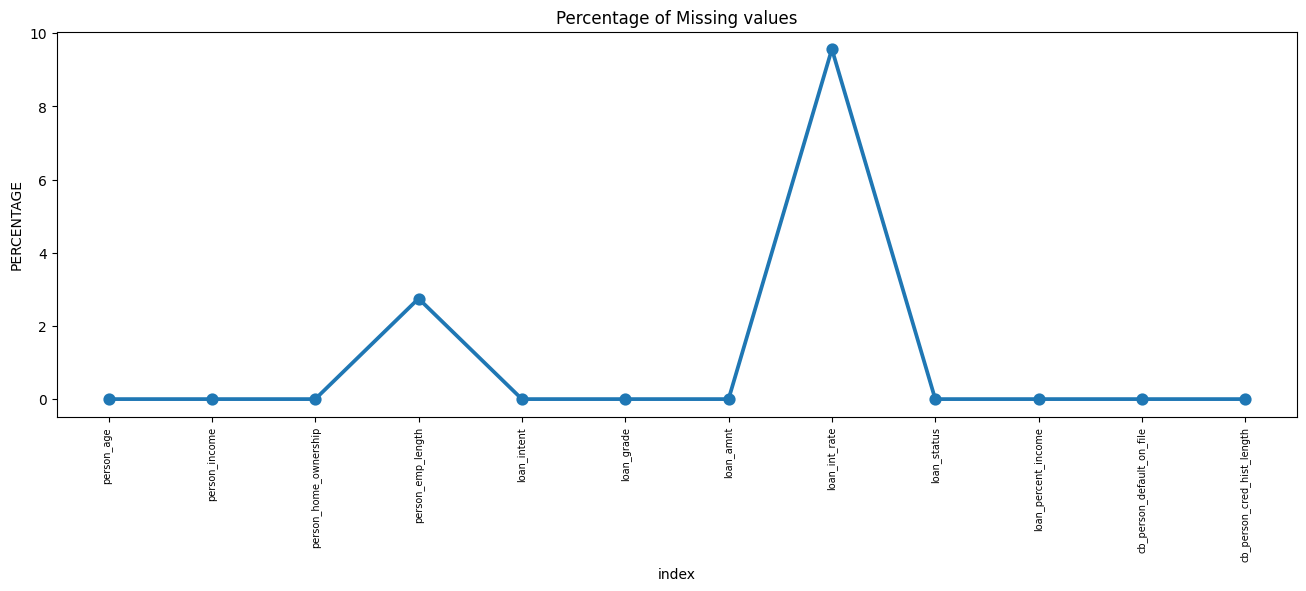

In [12]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Handling missing values in person_emp_length and loan_int_rate


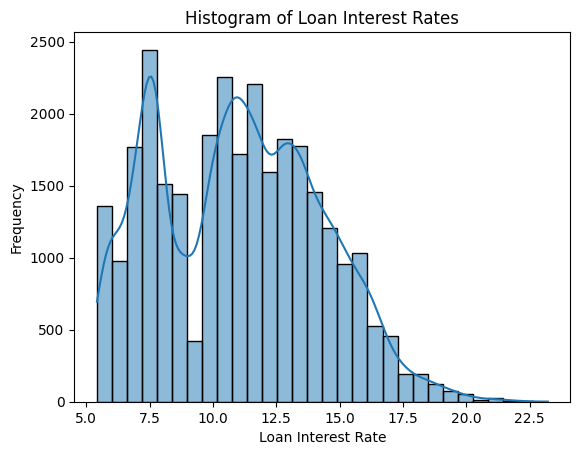

In [13]:
#visualizing to find the distribution
sns.histplot(df['loan_int_rate'], bins=30, kde=True)
plt.title('Histogram of Loan Interest Rates')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.show()

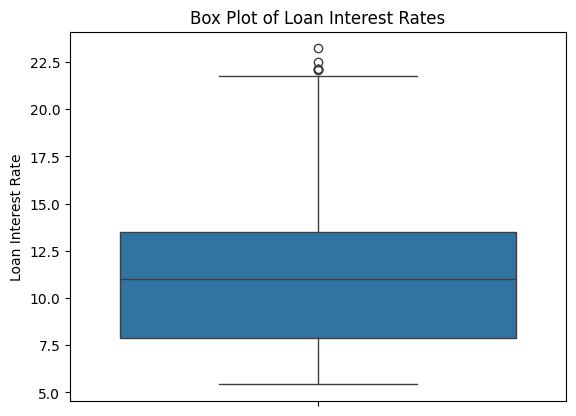

In [14]:
sns.boxplot(df['loan_int_rate'])
plt.title('Box Plot of Loan Interest Rates')
plt.ylabel('Loan Interest Rate')
plt.show()

Overall, the plots indicates that the majority of loan interest rates are concentrated between 10.0 and 12.5, with a decreasing frequency of higher rates. The POSITIVELY SKEWED that there are a few higher interest rates that are influencing the overall distribution.

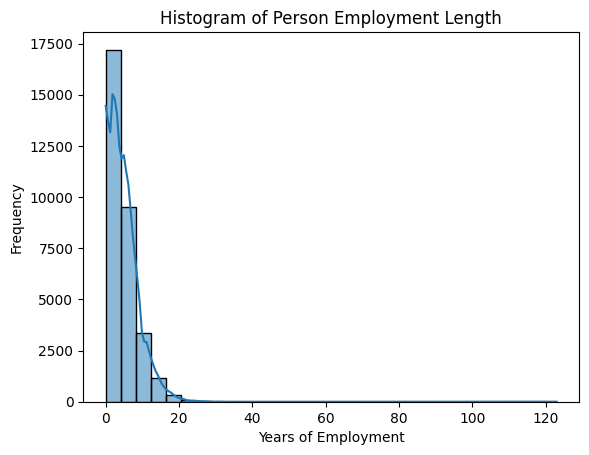

In [15]:
sns.histplot(df['person_emp_length'], bins=30, kde=True)
plt.title('Histogram of Person Employment Length')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')
plt.show()

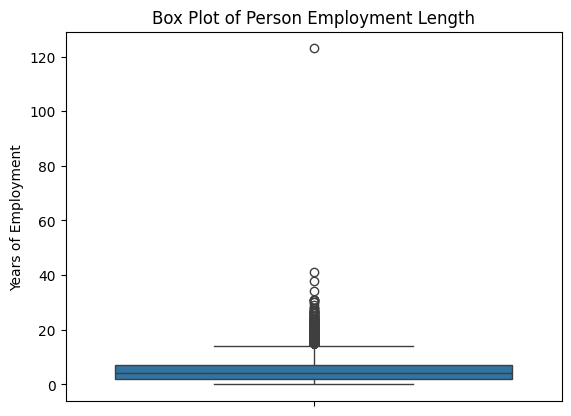

In [16]:
sns.boxplot(df['person_emp_length'])
plt.title('Box Plot of Person Employment Length')
plt.ylabel('Years of Employment')
plt.show()

the plot indicates that the majority of individuals in the dataset have relatively short employment lengths, with a decreasing frequency of longer tenures. The heavy right-skewness/ POSITIVELY SKEWED suggests that there are a few individuals with exceptionally long employment lengths.

In [17]:
median_loan_int_rate = df['loan_int_rate'].median()
df['loan_int_rate'] = df['loan_int_rate'].fillna(median_loan_int_rate)

In [18]:
median_person_emp_length = df['person_emp_length'].median()
df['person_emp_length'] = df['person_emp_length'].fillna(median_person_emp_length)

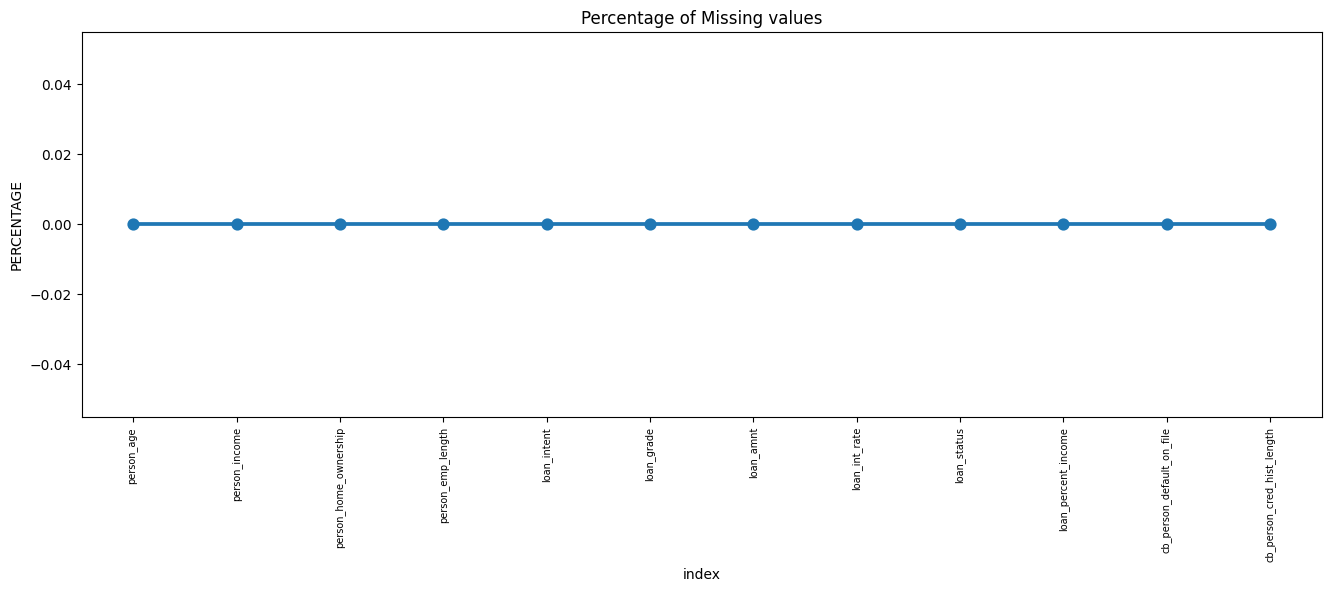

In [19]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

No missing values


Converting Categorical data into Numerical data

In [20]:
le = LabelEncoder()
df['loan_grade'] = le.fit_transform(df['loan_grade'])

In [21]:
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

In [22]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[['person_home_ownership', 'loan_intent']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['person_home_ownership', 'loan_intent']))
df = df.drop(columns=['person_home_ownership', 'loan_intent'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,3.0,3,35000,16.02,1,0.59,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


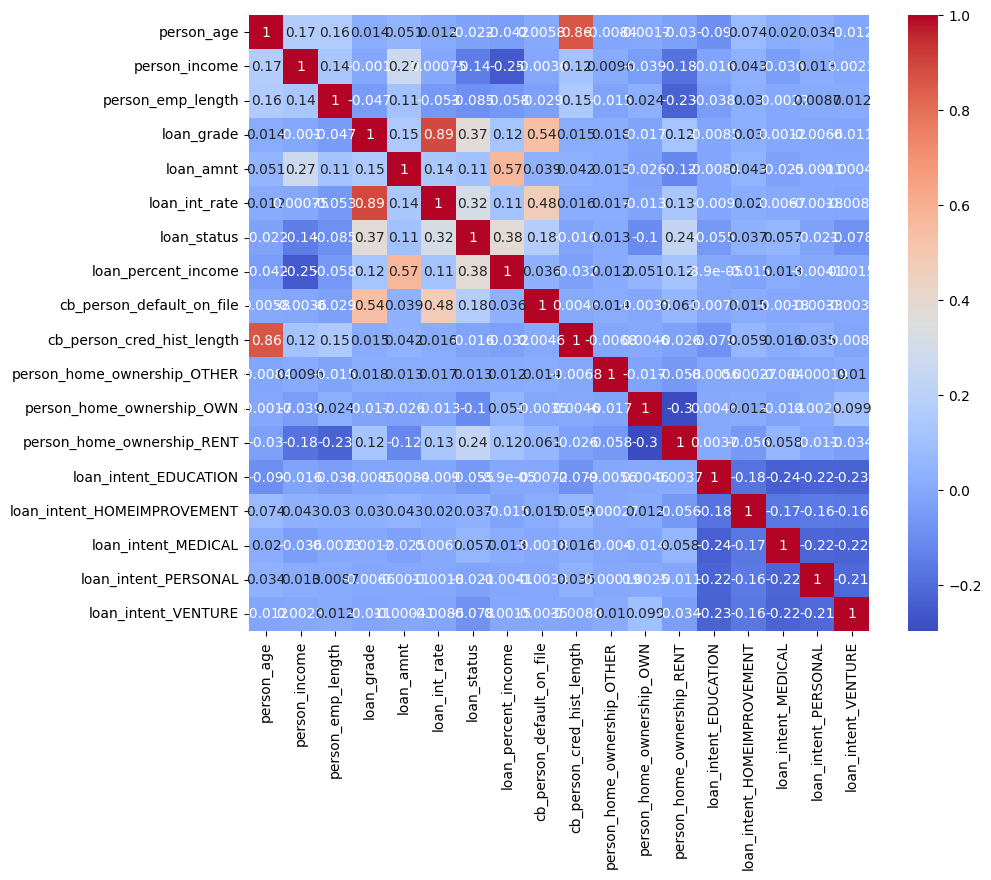

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
#finding debt to income ratio
df['debt_income_ratio'] = df['loan_amnt'] / df['person_income']


In [26]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,debt_income_ratio
0,22,59000,3.0,3,35000,16.02,1,0.59,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.593220
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.104167
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.572917
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.534351
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.643382


Descriptive Statistics


In [27]:
df[df['person_age']>100]

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,debt_income_ratio
81,144,250000,4.0,2,4800,13.57,0,0.02,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.019200
183,144,200000,4.0,1,6000,11.86,0,0.03,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.030000
575,123,80004,2.0,1,20400,10.25,0,0.25,0,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.254987
747,123,78000,7.0,1,20000,10.99,0,0.26,0,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.256410
32297,144,6000000,12.0,2,5000,12.73,0,0.00,0,25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000833


In [28]:
df = df.drop([81, 183, 575, 747, 32297])

In [29]:
print(df.describe())

         person_age  person_income  person_emp_length    loan_grade  \
count  32576.000000   3.257600e+04       32576.000000  32576.000000   
mean      27.718044   6.588214e+04           4.764152      1.218167   
std        6.204990   5.253499e+04           4.034612      1.166407   
min       20.000000   4.000000e+03           0.000000      0.000000   
25%       23.000000   3.850000e+04           2.000000      0.000000   
50%       26.000000   5.500000e+04           4.000000      1.000000   
75%       30.000000   7.920000e+04           7.000000      2.000000   
max       94.000000   2.039784e+06         123.000000      6.000000   

          loan_amnt  loan_int_rate   loan_status  loan_percent_income  \
count  32576.000000   32576.000000  32576.000000         32576.000000   
mean    9589.117755      11.009486      0.218197             0.170212   
std     6321.886846       3.081794      0.413029             0.106778   
min      500.000000       5.420000      0.000000             0.00000

Bivariate Analysis


In [30]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'debt_income_ratio'],
      dtype='object')

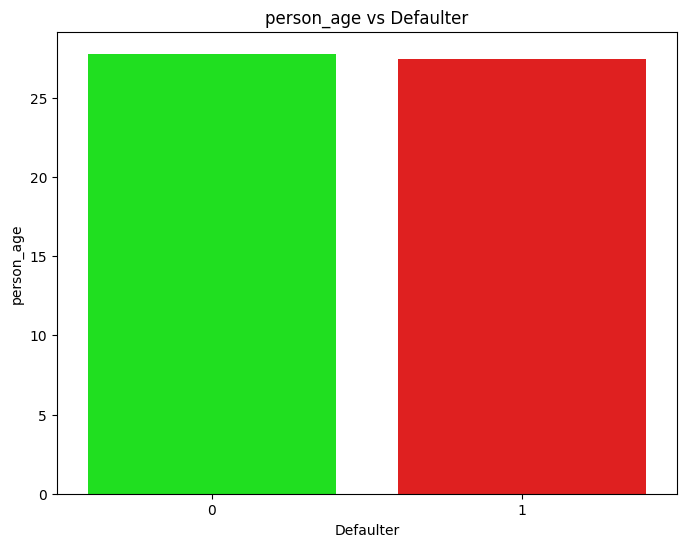

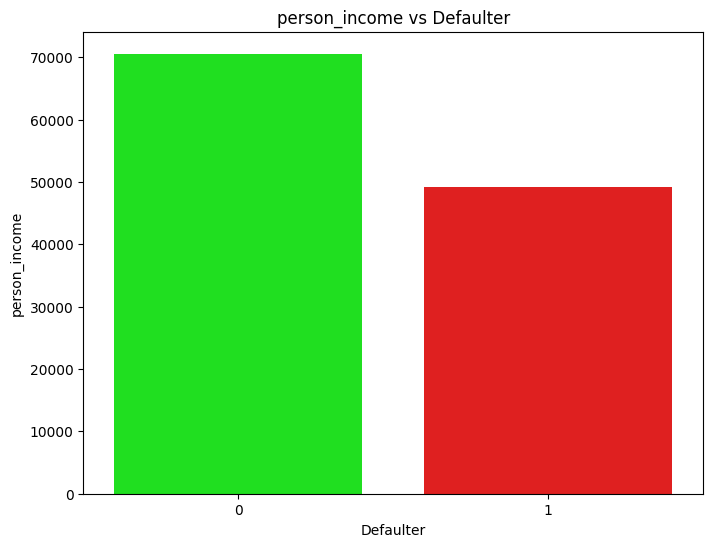

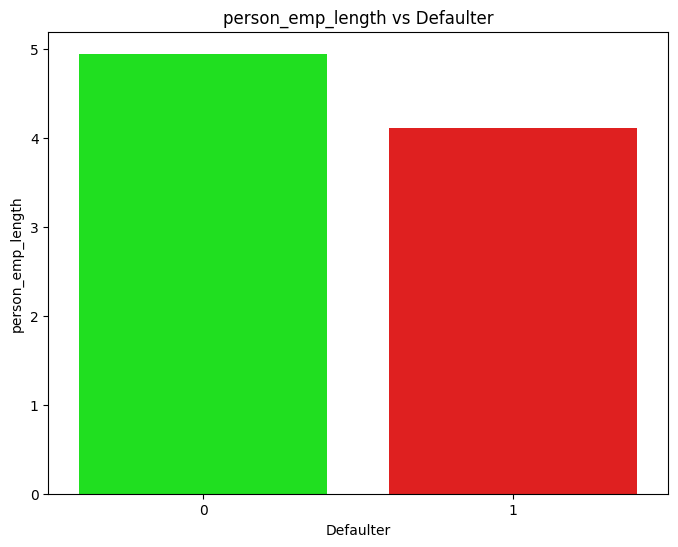

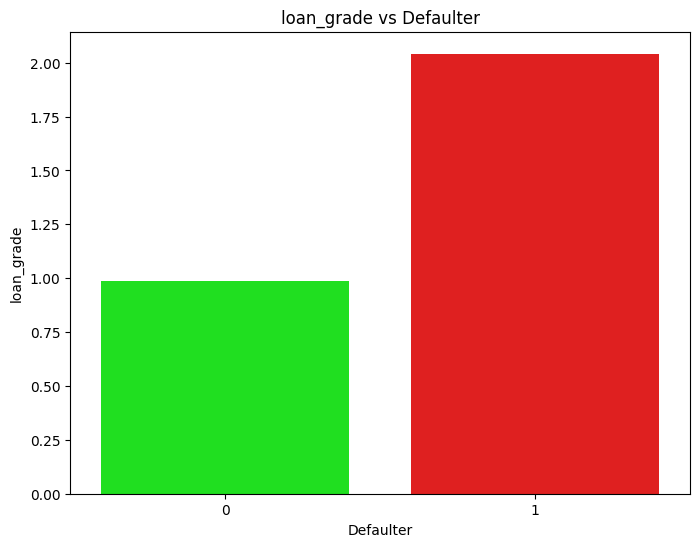

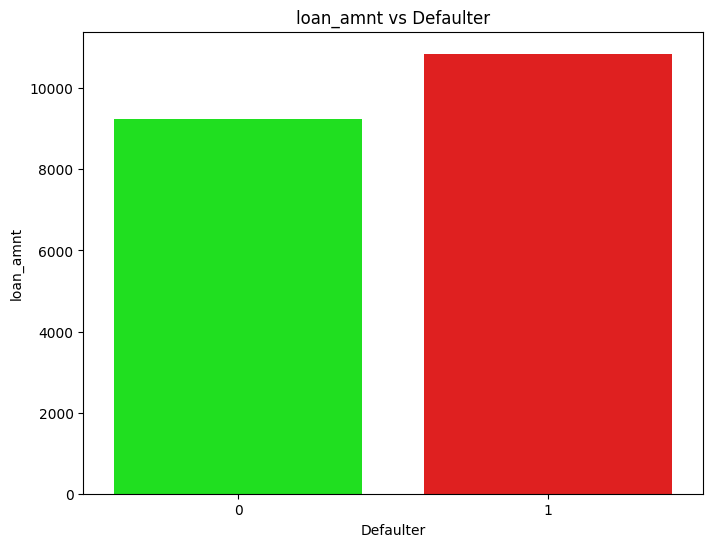

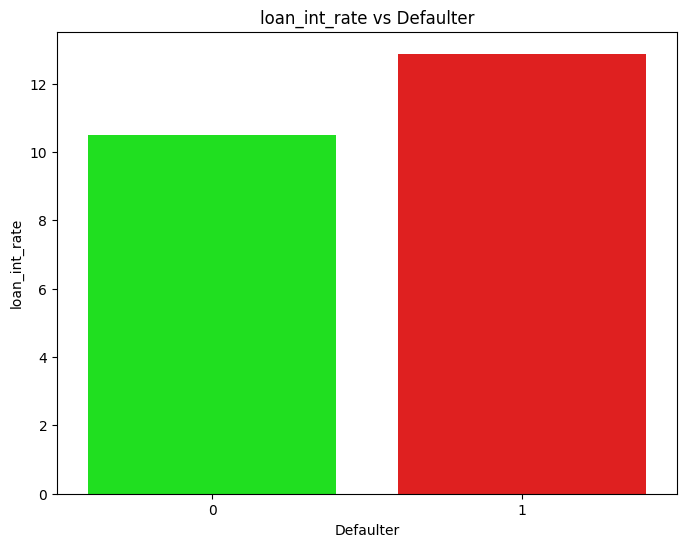

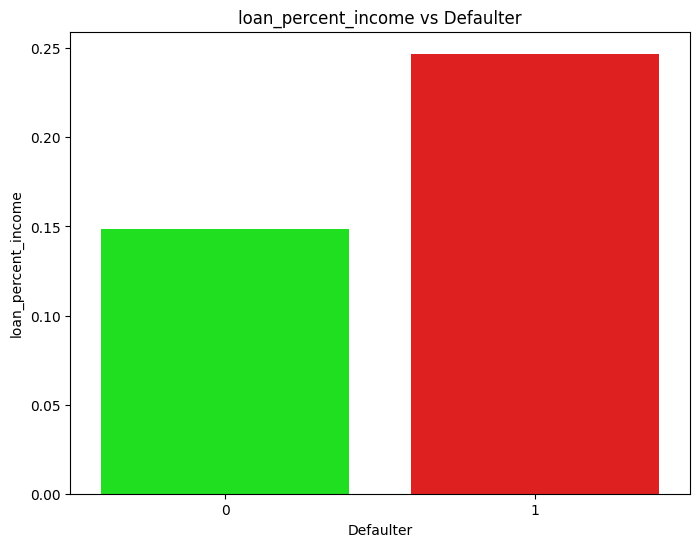

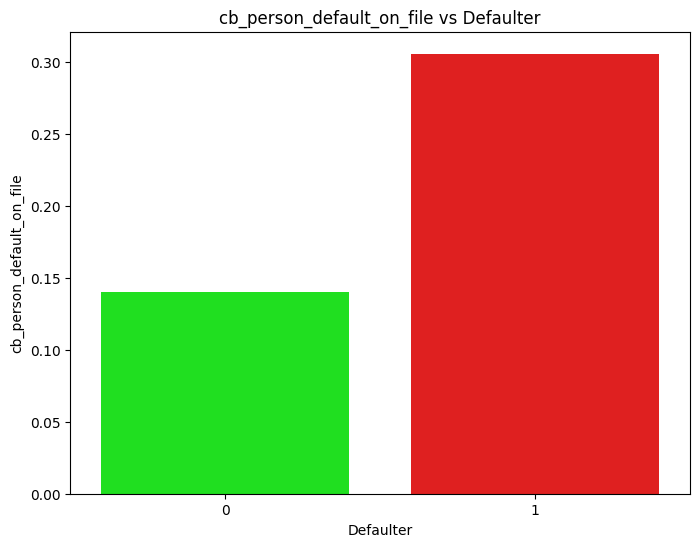

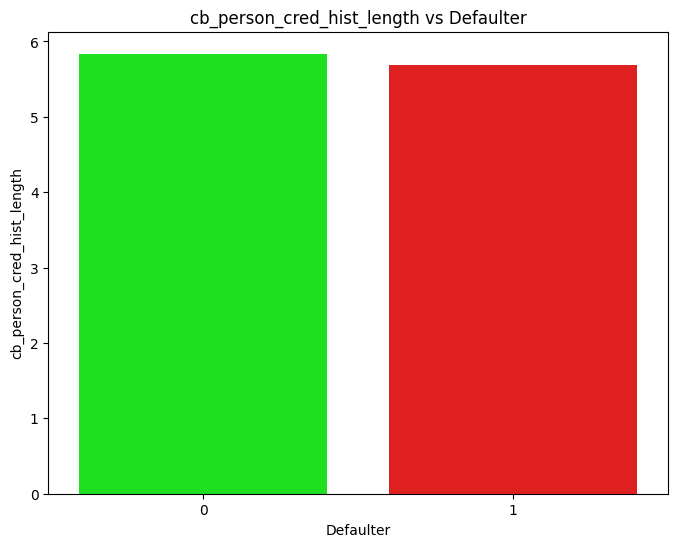

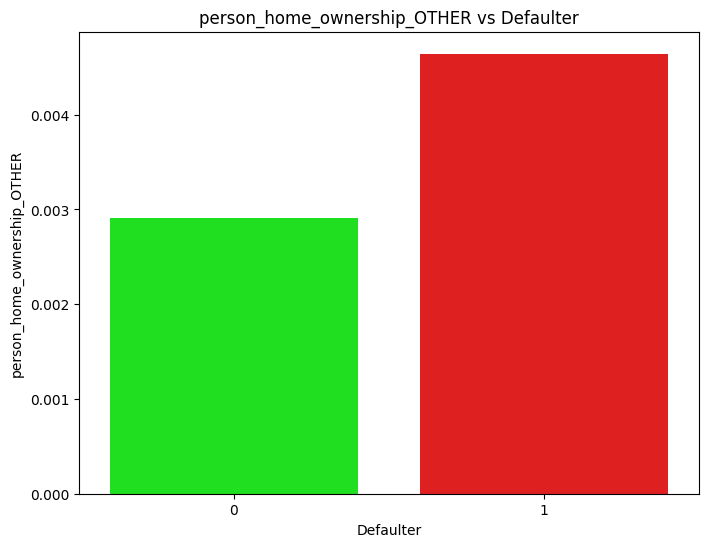

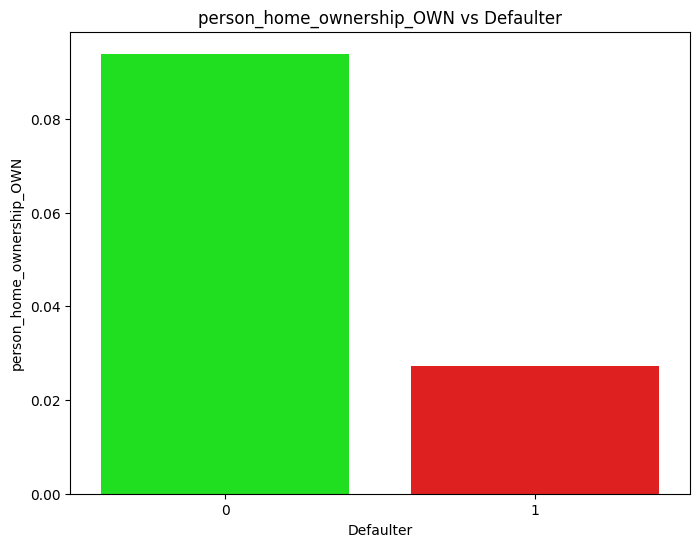

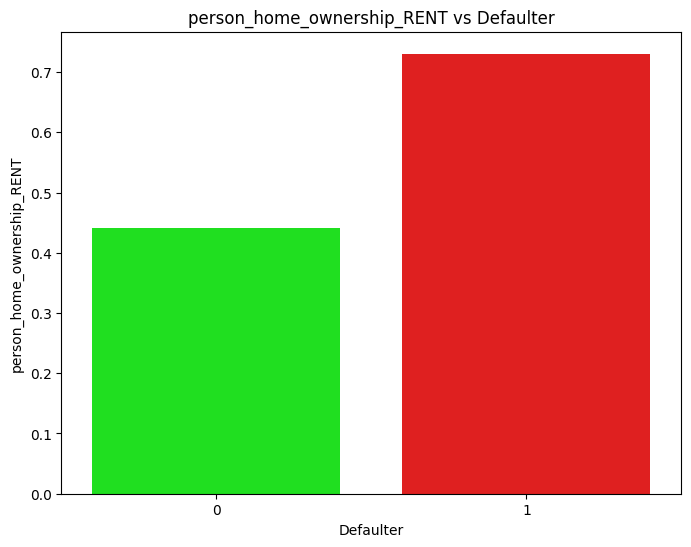

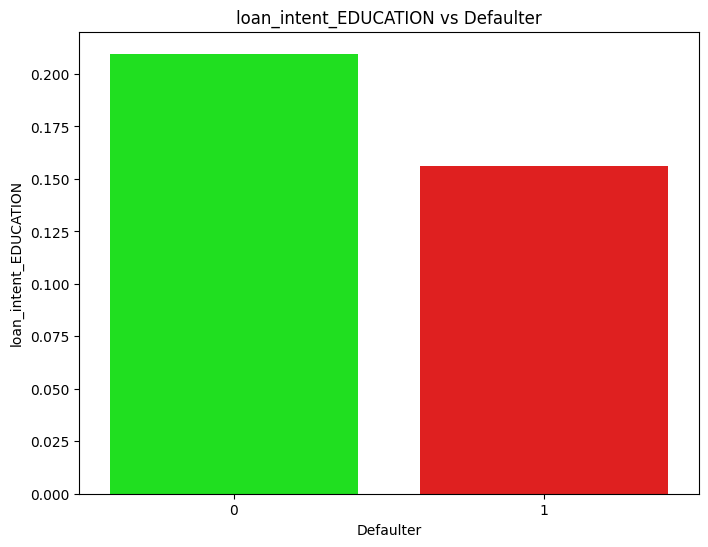

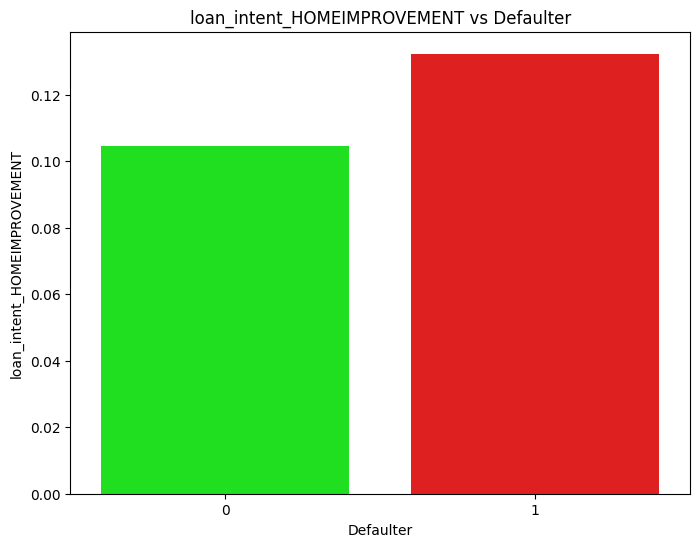

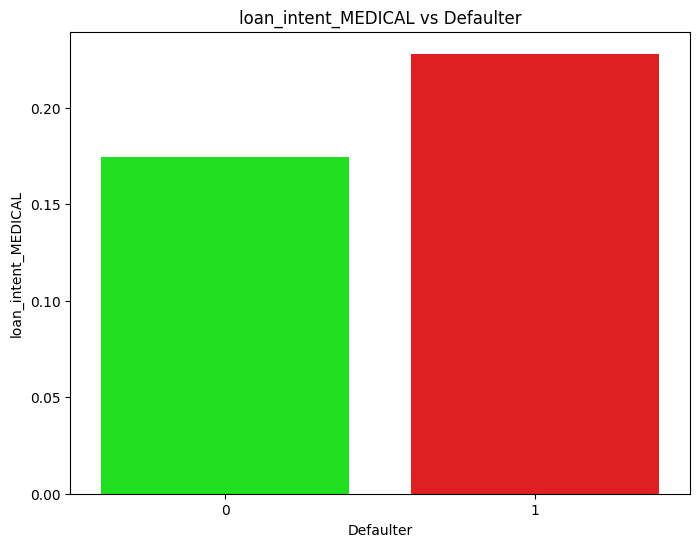

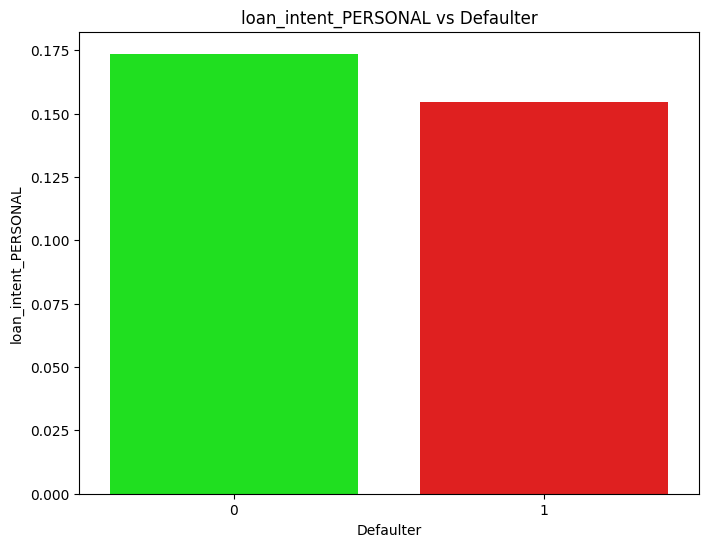

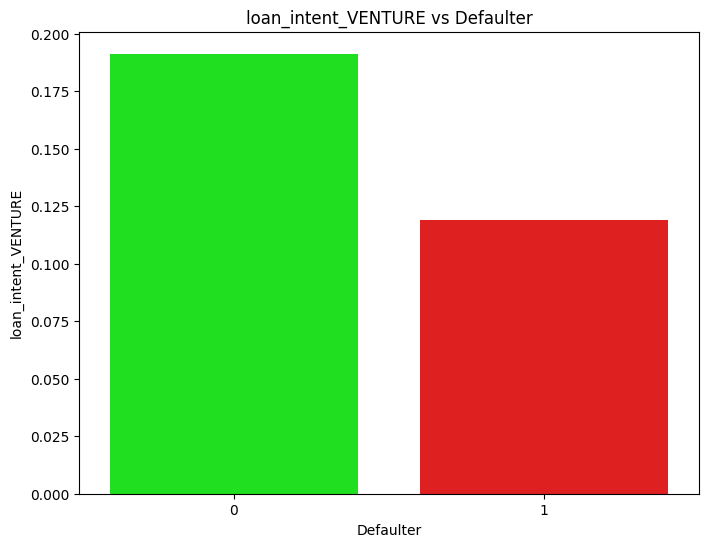

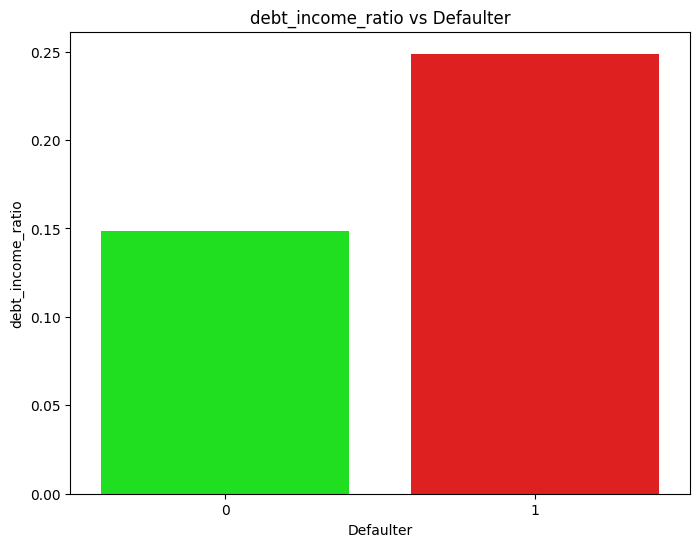

In [31]:
columns = [col for col in df.columns if col != 'loan_status']

# Plotting for numeric variables
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df['loan_status'],
            y=df[col],
            errorbar=None,
            hue=df['loan_status'],
            palette=['#00FF00', '#FF0000'],
            legend=False)
    plt.title(f'{col} vs Defaulter')
    plt.ylim(0, None)
    plt.xlabel('Defaulter')
    plt.show()

Borrowers with higher income, job stability, and lower interest loans tend to be less risky. However, those with higher loan amounts, interest rates, and debt-to-income ratios are more likely to default, especially if they are renters or have prior defaults on record.

MultiVariate analysis


In [32]:
corr_matrix = df.corr()

# Sort correlation values for loan_status
corr_with_target = corr_matrix['loan_status'].sort_values(ascending=False)

# Display correlations
print(corr_with_target)

loan_status                    1.000000
debt_income_ratio              0.385882
loan_percent_income            0.379374
loan_grade                     0.373106
loan_int_rate                  0.319395
person_home_ownership_RENT     0.238469
cb_person_default_on_file      0.179111
loan_amnt                      0.105411
loan_intent_MEDICAL            0.056559
loan_intent_HOMEIMPROVEMENT    0.036579
person_home_ownership_OTHER    0.012539
cb_person_cred_hist_length    -0.015504
person_age                    -0.020721
loan_intent_PERSONAL          -0.021090
loan_intent_EDUCATION         -0.055315
loan_intent_VENTURE           -0.078240
person_emp_length             -0.084973
person_home_ownership_OWN     -0.101987
person_income                 -0.168507
Name: loan_status, dtype: float64


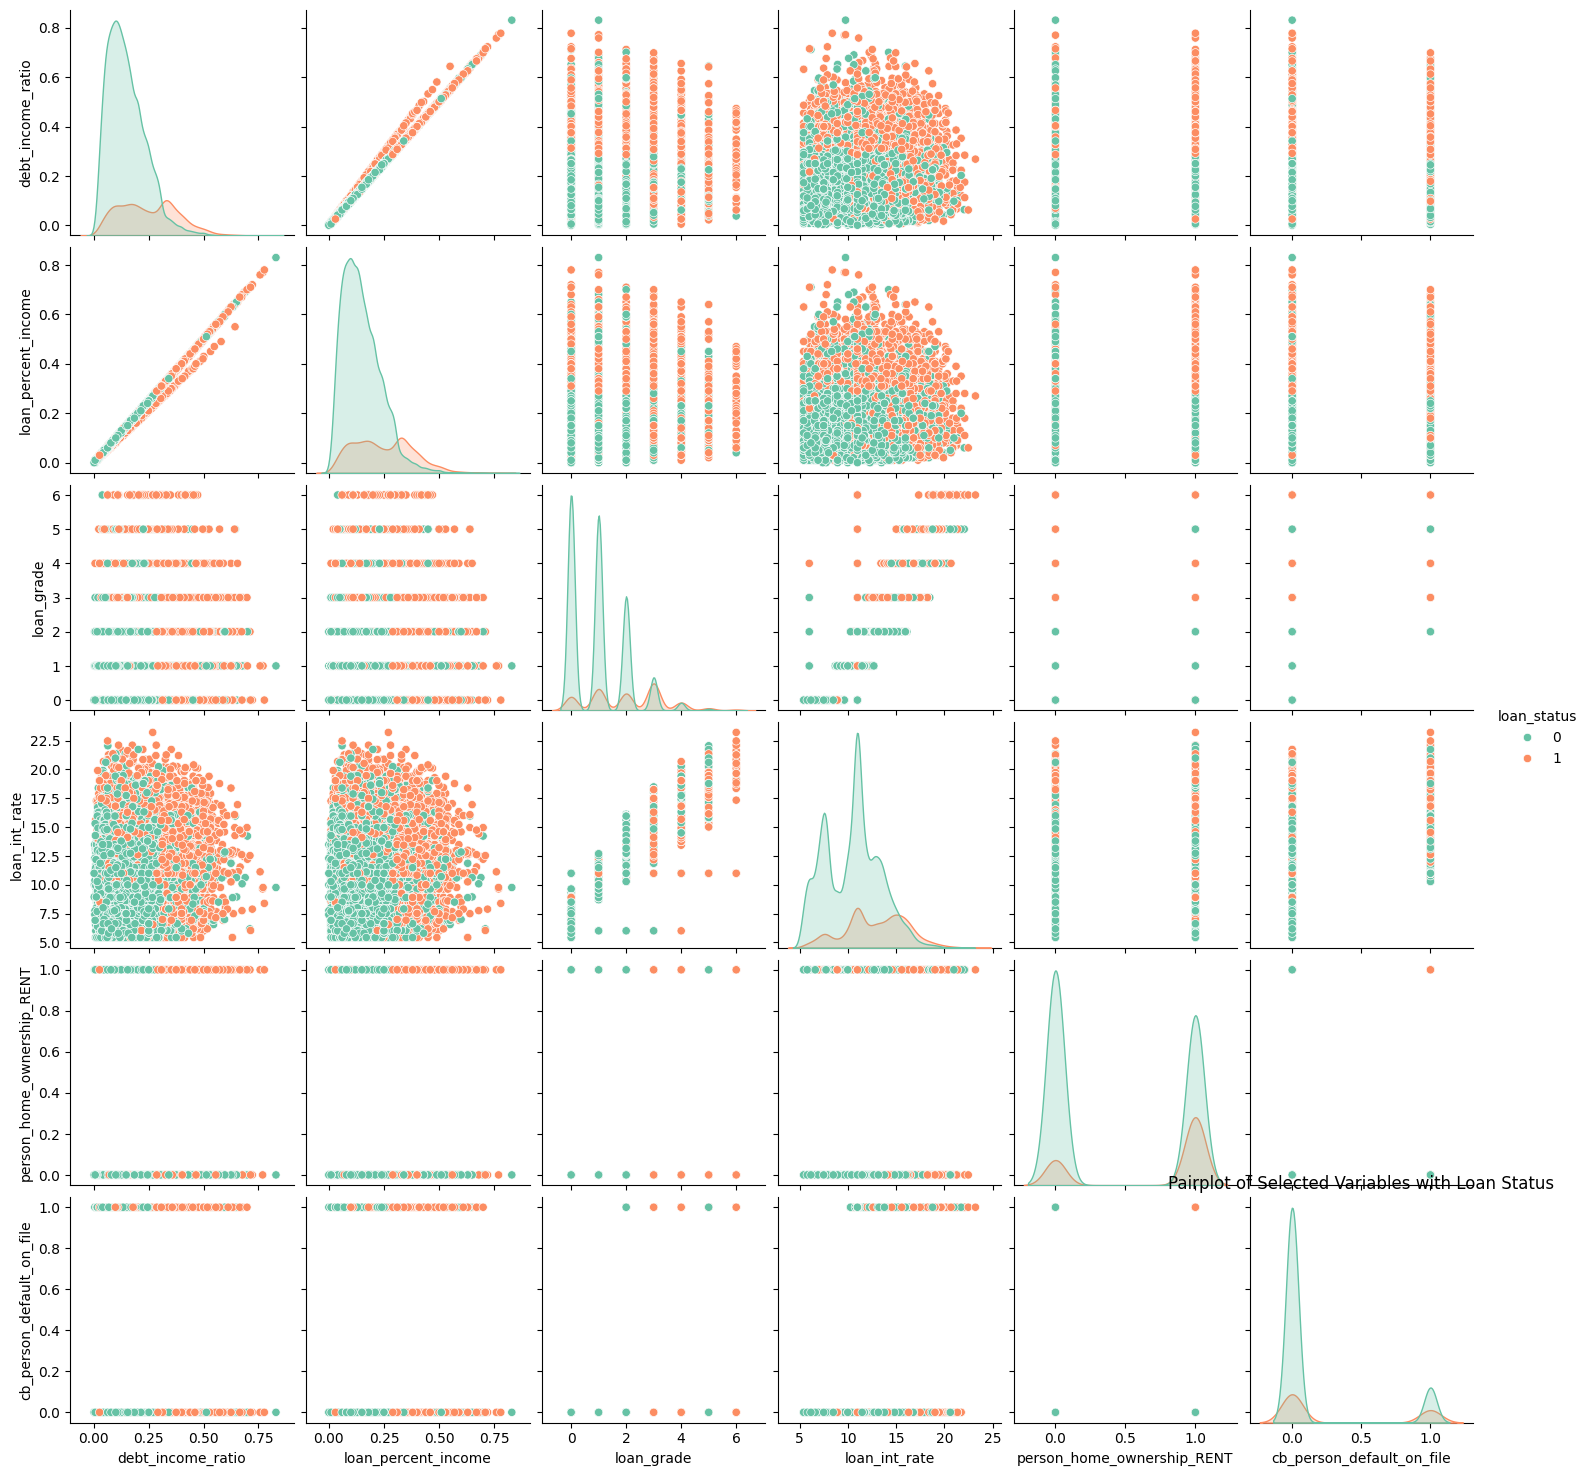

In [33]:
#pairplot relationship b/w variables
selected_columns = [
    'loan_status',
    'debt_income_ratio',
    'loan_percent_income',
    'loan_grade',
    'loan_int_rate',
    'person_home_ownership_RENT',
    'cb_person_default_on_file'
]

# Create a DataFrame with the selected columns
df_selected = df[selected_columns]

# Create a pairplot
sns.pairplot(df_selected, hue='loan_status', palette='Set2')
plt.title('Pairplot of Selected Variables with Loan Status')
plt.show()



*   Borrowers with higher loan grades (indicating better creditworthiness) tend to secure lower interest rates
*   Higher debt-to-income ratios and larger portions of income allocated to loan payments suggest increased susceptibility to financial difficulties and default.



